# **Model Building and Training**

**Task 3: Model Training**

**Feature Selection**

In [88]:
# Load the saved trained and test dataset
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train.csv')
test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test.csv')

In [89]:
# Check the size of the trained and tested dataset
print("Size of the training dataset:", train_data.shape)
print("Size of the testing dataset:", test_data.shape)

Size of the training dataset: (404, 14)
Size of the testing dataset: (102, 14)


Correlation Matrix (Training Data):
             crim        zn     indus       nox        rm       age       dis  \
crim     1.000000 -0.237880  0.479627  0.473373 -0.253976  0.391575 -0.436198   
zn      -0.237880  1.000000 -0.535734 -0.526375  0.281710 -0.577055  0.676976   
indus    0.479627 -0.535734  1.000000  0.773807 -0.404138  0.638346 -0.714830   
nox      0.473373 -0.526375  0.773807  1.000000 -0.307364  0.720487 -0.779471   
rm      -0.253976  0.281710 -0.404138 -0.307364  1.000000 -0.213977  0.205931   
age      0.391575 -0.577055  0.638346  0.720487 -0.213977  1.000000 -0.763044   
dis     -0.436198  0.676976 -0.714830 -0.779471  0.205931 -0.763044  1.000000   
rad      0.727800 -0.314859  0.593418  0.588976 -0.197916  0.430427 -0.489393   
tax      0.685821 -0.295523  0.699990  0.651668 -0.279955  0.471718 -0.529271   
ptratio  0.340929 -0.390441  0.349235  0.161031 -0.344433  0.242070 -0.223762   
b       -0.417000  0.179298 -0.365605 -0.368613  0.110572 -0.265489  0.29

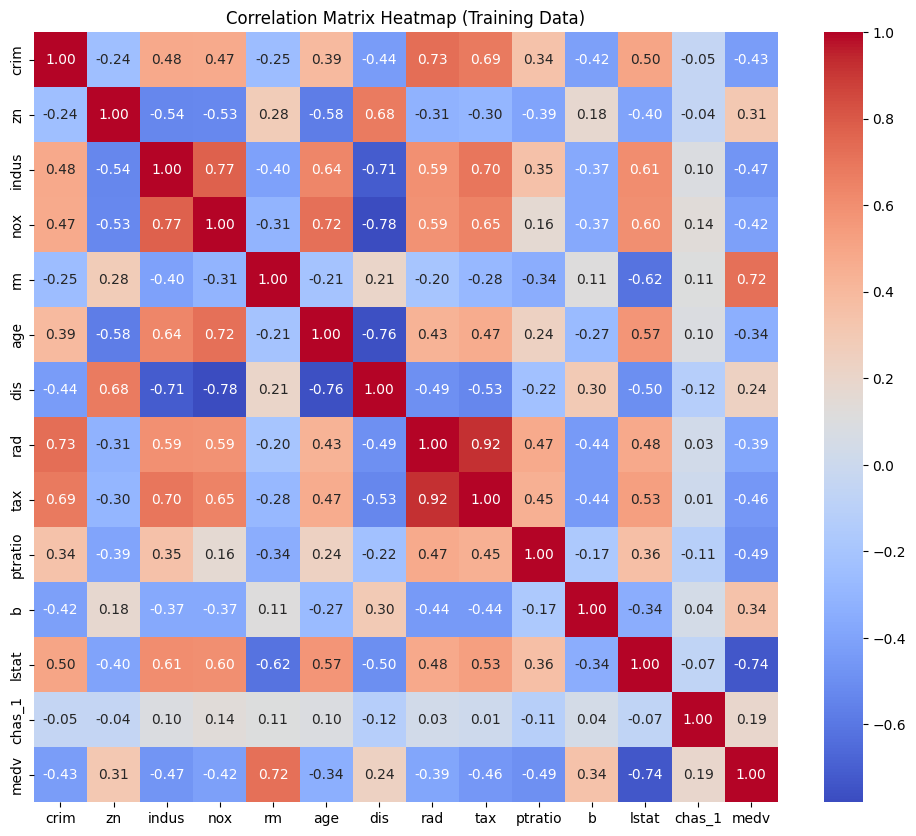

In [90]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train.csv')

# Calculate the correlation matrix on the training dataset
correlation_matrix = train_data.corr()

# Display the correlation matrix
print("Correlation Matrix (Training Data):")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Training Data)')
plt.show()


In [91]:
# Choose features with high correlation to the target variable 'medv'
# Assuming a threshold of 0.5 for high correlation
threshold = 0.5
correlation_with_target = correlation_matrix['medv'].drop('medv')
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()

# Display selected features
print("\nSelected Features for the Model (Training Data):")
print(selected_features)


Selected Features for the Model (Training Data):
['rm', 'lstat']


In [92]:
# Load the training and testing datasets
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train.csv')
test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test.csv')

# Selected features based on correlation analysis
selected_features = ['rm', 'lstat']

# Add target variable to the selected features list
selected_features.append('medv')

# Select the features from the training and testing datasets
train_data_selected = train_data[selected_features]
test_data_selected = test_data[selected_features]

# Save the selected features datasets to the drive
train_data_selected.to_csv('drive/MyDrive/Datasets/BostonHousing_train_selected.csv', index=False)
test_data_selected.to_csv('drive/MyDrive/Datasets/BostonHousing_test_selected.csv', index=False)

print("Selected features training and testing data saved successfully.")

Selected features training and testing data saved successfully.


In [93]:
# Train a linear regression model

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the training and testing datasets with selected features
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train_selected.csv')
test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test_selected.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['medv'])
y_train = train_data['medv']
X_test = test_data.drop(columns=['medv'])
y_test = test_data['medv']

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [94]:
# Altenatively

# Select features and target variable
# Selected features based on correlation analysis
features = ['rm', 'lstat']
target = 'medv'  # Target variable

# # Load the training and testing datasets
# train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train.csv')
# test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test.csv')

# Extract the input features and target variable for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Train a Linear Regression model
# Initialize and fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# # Make predictions
# # Use the trained model to predict the target variable for the test data
# y_pred = model.predict(X_test)

LinearRegression()

In [95]:
# Perform hyperparameter tuning

# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Linear Regression model
model = LinearRegression()

# Define the hyperparameters and their values for tuning
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False] #added positive parameter
}

# Initialize GridSearchCV with the model and hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'fit_intercept': False, 'positive': False}
